In [1]:
import cv2
import numpy as np
import json
from collections import defaultdict

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
import os

from sklearn import metrics
from collections import Counter

In [2]:
output_folder='final_cluster'
FPS=25
min_occurrences=30
heatmap_image = cv2.imread("footballTracking\map_heat.png")
height, width, channels = heatmap_image.shape

# Load the player data from the JSON file 
file_name= "footballTracking/barca_fixes.json"
with open(file_name, "r") as json_file:
    data = json.load(json_file)


## 1-drop IDs with fewer than X occurrences

In [4]:
def transform_data_to_lists(frame_data_dict):
    frames = sorted(frame_data_dict.keys(), key=lambda x: int(x))
    all_projected_points = []
    all_MapIDs = []
    
    for frame in frames:
        frame_data = frame_data_dict[frame]
        projected_points = []
        MapIDs = []
        
        for ID, coords in frame_data.items():
            i_ID =int(ID)
            MapIDs.append(i_ID)
            projected_points.append([coords["x"], coords["y"]])
        
        all_projected_points.append(projected_points)
        all_MapIDs.append(MapIDs)
    
    return all_projected_points, all_MapIDs 


def drop_unreliable_ids(all_projected_points ,all_MapIDs , data ,output_folder,min_occurrences,width,height):
    
    """ Remove player IDs with fewer than `min_occurrences` occurrences """

    frame_number = 0
    os.makedirs(output_folder, exist_ok=True)
    
    copy_coords= all_projected_points
    copy_ids=all_MapIDs
    final_ids=[]
    final_coords=[]
    occurrences = defaultdict(int)
    # Count the number of occurrences for each player ID
    for frame_num in all_MapIDs:
        for player_id in frame_num:
            temp_id = occurrences[player_id]
            temp_id+=1
            occurrences[player_id] =temp_id
    #print(occurrences)
    
    for i,frame in enumerate(copy_ids):
        print(i,len(frame),"**\n")
        temp_ids=[]
        temp_coords=[]
        for j,id in enumerate(frame): 
            #print(j ,id)
            if occurrences[id] >= min_occurrences:
                temp_ids.append(id)
                temp_coords.append(copy_coords[i][j])
            else:
                continue

        final_ids.append(temp_ids)
        final_coords.append(temp_coords)

        # Convert to numpy array for processing
        temp_coords = np.array(temp_coords)
        
        # Generate a 2D histogram for the heatmap
        heatmap, xedges, yedges = np.histogram2d(temp_coords[:, 0], temp_coords[:, 1], bins=[width, height], range=[[0, width], [0, height]])
        
        # Plot heatmap
        plt.imshow(heatmap_image)
        sns.heatmap(heatmap.T, cmap='coolwarm', cbar=False, square=True , alpha=0.3)
        
        # Annotate player IDs on the heatmap
        for i, (x, y) in enumerate(temp_coords):
            # Scatter player points on the heatmap
            plt.scatter(temp_coords[:, 0] / (width / 450), temp_coords[:, 1] / (height / 315), color='red', s=40)
            plt.text(x / (width / 450), y / (height / 315), str(temp_ids[i]), color='white', fontsize=12, ha='center', va='center', weight='bold')
        
        # Remove axis for a cleaner image
        plt.axis('off')
        # Save heatmap frame as an image
        plt.title(f'Frame {frame_number+1}')
        plt.xlabel('X-coordinate')
        plt.ylabel('Y-coordinate')
        plt.savefig(f'{output_folder}/frame_{frame_number:04d}.png')
        plt.close()  # Close the plot to avoid memory issues
        
        frame_number +=1
                
        print(f'**{len(temp_ids)}**,**{len(temp_coords)}**' if len(temp_ids)!=len(frame) else '')

    return final_ids, final_coords


    

In [5]:
all_projected_points, all_MapIDs  = transform_data_to_lists(data)
filtered_id, filtered_coords = drop_unreliable_ids(all_projected_points,all_MapIDs ,data,output_folder,min_occurrences,width,height)

0 16 **

**13**,**13**
1 20 **

**16**,**16**
2 19 **

**16**,**16**
3 19 **

**16**,**16**
4 22 **

**16**,**16**
5 21 **

**16**,**16**
6 22 **

**18**,**18**
7 22 **

**19**,**19**
8 21 **

**19**,**19**
9 21 **

**19**,**19**
10 21 **

**19**,**19**
11 22 **

**19**,**19**
12 20 **

**19**,**19**
13 21 **

**19**,**19**
14 22 **

**19**,**19**
15 21 **

**19**,**19**
16 20 **

**19**,**19**
17 20 **

**19**,**19**
18 20 **

**19**,**19**
19 19 **


20 19 **


21 20 **


22 22 **

**20**,**20**
23 20 **


24 20 **


25 20 **


26 21 **

**20**,**20**
27 20 **

**19**,**19**
28 20 **

**18**,**18**
29 20 **

**19**,**19**
30 20 **

**19**,**19**
31 19 **

**18**,**18**
32 20 **


33 20 **


34 20 **


35 20 **


36 21 **


37 21 **


38 21 **


39 21 **


40 21 **


41 21 **

**20**,**20**
42 22 **

**21**,**21**
43 22 **

**21**,**21**
44 22 **

**21**,**21**
45 21 **


46 20 **


47 19 **


48 19 **


49 21 **


50 21 **


51 20 **


52 21 **


53 20 **


54 20 **


55 21 **


56 2

In [6]:
print ("list od IDS",type(filtered_id) , filtered_id)
print ("list of coordinates",type(filtered_coords),filtered_coords)

list od IDS <class 'list'> [[4, 5, 1, 7, 3, 8, 2, 6, 11, 9, 17, 10, 18], [5, 1, 3, 4, 18, 2, 8, 6, 7, 9, 10, 17, 19, 21, 11, 22], [5, 3, 1, 19, 7, 4, 8, 2, 6, 9, 10, 21, 11, 18, 22, 17], [4, 5, 3, 1, 18, 19, 6, 10, 7, 22, 17, 11, 2, 21, 8, 9], [5, 4, 1, 6, 18, 10, 7, 8, 22, 21, 17, 2, 19, 3, 9, 11], [5, 4, 18, 6, 10, 1, 19, 7, 8, 2, 22, 21, 11, 17, 3, 9], [5, 19, 4, 6, 1, 7, 18, 21, 10, 22, 11, 2, 9, 8, 28, 17, 3, 27], [5, 19, 7, 1, 17, 10, 22, 6, 4, 28, 3, 11, 21, 2, 8, 29, 9, 18, 27], [5, 1, 6, 3, 7, 28, 8, 10, 4, 17, 19, 22, 2, 9, 11, 29, 18, 21, 27], [1, 5, 28, 3, 2, 7, 19, 6, 22, 4, 9, 21, 11, 8, 29, 17, 18, 10, 27], [1, 7, 19, 2, 5, 3, 9, 6, 28, 11, 22, 17, 4, 10, 21, 29, 18, 8, 27], [19, 7, 17, 4, 2, 1, 22, 9, 3, 6, 21, 29, 5, 28, 10, 11, 27, 8, 18], [1, 4, 22, 5, 7, 17, 3, 21, 10, 19, 6, 29, 2, 9, 28, 18, 11, 27, 8], [17, 9, 4, 7, 19, 1, 2, 22, 5, 3, 11, 6, 10, 21, 28, 18, 8, 29, 27], [9, 17, 7, 19, 1, 5, 4, 3, 29, 11, 6, 10, 22, 2, 28, 8, 21, 18, 27], [9, 17, 7, 5, 6, 10, 19, 

In [7]:
#  create the video from the saved frames
# save the frames
frame_files = sorted([f for f in os.listdir(output_folder) if f.endswith('.png')])
first_image = cv2.imread(os.path.join(output_folder, frame_files[0]))
height, width, _ = first_image.shape
# Initialize video writer using OpenCV
output_video = cv2.VideoWriter('players_tracking_after_ids_drop.mp4', 
                               cv2.VideoWriter_fourcc(*'mp4v'), 
                               FPS,  # Frame rate (adjust as needed)
                               (width,height))  # Width and height of frames

# Iterate over the frame files and write to video
for frame_file in frame_files:
    frame_path = os.path.join(output_folder, frame_file)
    frame_image = cv2.imread(frame_path)
    output_video.write(frame_image)

# Release the video writer
output_video.release()
print("Heatmap video with player IDs created successfully!")

Heatmap video with player IDs created successfully!


# 2-clustering multiple IDs that represent the same player

In [12]:
IDS= []
for ids in filtered_id:
    for id in ids: 
        IDS.append(id)
    
coordinates=[]
for item in filtered_coords:
    for peers in item:
        coordinates.append(peers)

# Convert to numpy array
coordinates = np.array(coordinates)

In [13]:
#normalize scale [0:1]
scaler = MinMaxScaler()
coords = np.array(coordinates)
scaler.fit(coords)
scaled_coords = scaler.transform(coords)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


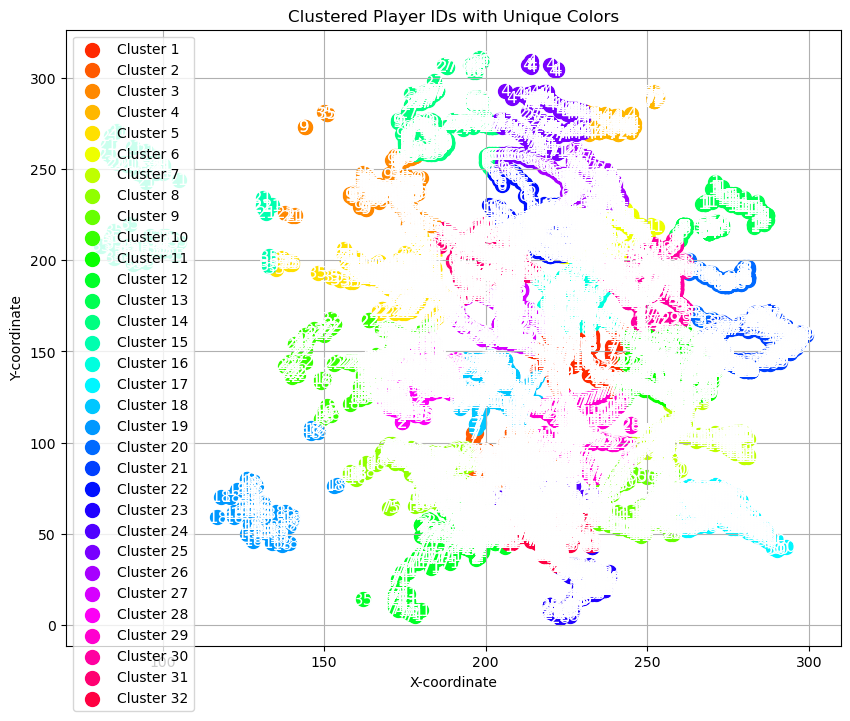

In [26]:
#choose K=32 as ids =32 label 
km = KMeans(n_clusters=32)
clusters = km.fit_predict(scaled_coords)

#Get unique cluster IDs (including noise as cluster -1)
unique_clusters = np.unique(clusters)

# Generate colors for each cluster (we use Seaborn's color palette)
palette = sns.color_palette("hsv", len(unique_clusters))

# Plot the clusters with unique colors
plt.figure(figsize=(10, 8))

for i, cluster_id in enumerate(unique_clusters):
    # Find points corresponding to the current cluster
    cluster_indices = np.where(clusters == cluster_id)
    cluster_points = coordinates[cluster_indices]
    
    # If it's noise (-1), assign a special color (e.g., black)
    if cluster_id == -1:
        color = "black"
        label = "Noise"
    else:
        color = palette[i]  # Get color from palette for each cluster
        label = f"Cluster {cluster_id+1}"
    
    # Scatter plot for each cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label, s=100)

# Add player IDs as annotations in the plot
for i, (x, y) in enumerate(coordinates):
    plt.text(x, y, str(IDS[i]), fontsize=12, ha='center', va='center', color='white')
   

# Add title and labels
plt.title("Clustered Player IDs with Unique Colors")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.legend(loc='best', fontsize='medium')
plt.grid(True)
plt.show()

In [27]:
# Print the clusters with player IDs
for cluster_id_label in unique_clusters:
    players=set()
    for i, player_id in enumerate(IDS):
        if (cluster_id_label== clusters[i]):
            players.add(player_id)
    print(f"In Cluster {cluster_id_label+1} there is players {players}")

km.cluster_centers_

In Cluster 1 there is players {2, 5, 71, 7, 8, 10, 17, 19}
In Cluster 2 there is players {2, 5, 7, 71, 10, 75, 17, 50, 83, 18}
In Cluster 3 there is players {9, 35, 21}
In Cluster 4 there is players {72, 4}
In Cluster 5 there is players {35, 104, 10, 21, 22}
In Cluster 6 there is players {1, 5, 6, 71, 8, 19, 54, 27}
In Cluster 7 there is players {2, 3, 8, 11, 50, 120, 28, 29}
In Cluster 8 there is players {2, 42, 75, 18, 19}
In Cluster 9 there is players {17, 50, 11, 28}
In Cluster 10 there is players {35, 104, 10, 113, 18, 22}
In Cluster 11 there is players {2, 3, 7, 8, 11, 17, 27, 29}
In Cluster 12 there is players {2, 35, 71, 42, 75, 17, 18, 83, 19}
In Cluster 13 there is players {8, 1, 54}
In Cluster 14 there is players {9, 66, 27, 6}
In Cluster 15 there is players {35, 21}
In Cluster 16 there is players {5, 71, 8, 10, 17, 19, 27}
In Cluster 17 there is players {50, 28}
In Cluster 18 there is players {2, 7, 10, 17, 18, 22}
In Cluster 19 there is players {18}
In Cluster 20 there is 

array([[0.67324223, 0.46740618],
       [0.58303709, 0.2782424 ],
       [0.4157549 , 0.75867616],
       [0.74273487, 0.89263552],
       [0.4292121 , 0.6066068 ],
       [0.71163997, 0.68751501],
       [0.83305971, 0.32885308],
       [0.46622842, 0.26010926],
       [0.77082682, 0.1968062 ],
       [0.39479807, 0.46714127],
       [0.80917606, 0.44859537],
       [0.52535592, 0.15749602],
       [0.88299112, 0.71759475],
       [0.49301862, 0.88216443],
       [0.07752294, 0.72112611],
       [0.66599663, 0.56761703],
       [0.87720456, 0.19241295],
       [0.55612863, 0.41208519],
       [0.23062093, 0.19600623],
       [0.88676567, 0.59958249],
       [0.92591743, 0.4875037 ],
       [0.61868679, 0.70439461],
       [0.6899985 , 0.06211353],
       [0.62216465, 0.2108398 ],
       [0.62684555, 0.8943061 ],
       [0.69264798, 0.77104101],
       [0.57218279, 0.53084406],
       [0.45154591, 0.42284362],
       [0.67161826, 0.33003662],
       [0.7760972 , 0.60051061],
       [0.

In [28]:
#scaled ccoordinates
# Calculate the silhouette score
silhouette = metrics.silhouette_score(scaled_coords, clusters)
#Calculate the davies_bouldin_score
db_score=metrics.davies_bouldin_score(scaled_coords, clusters)

print("Silhouette Score:", silhouette)
print("Davies Bouldin Score", db_score)

Silhouette Score: 0.4208991617766285
Davies Bouldin Score 0.7264943038592611


In [29]:
# NOT Scaled ccoordinates
# Calculate the silhouette score 
silhouette = metrics.silhouette_score(coords, clusters)
#Calculate the davies_bouldin_score
db_score=metrics.davies_bouldin_score(coords, clusters)

print("Silhouette Score:", silhouette)
print("Davies Bouldin Score", db_score)

Silhouette Score: 0.4065413921949997
Davies Bouldin Score 0.7715365642448033


In [30]:
# Load background and overlay videos
background_video_path = 'C:/Users/DELL/Desktop/footballTracking/video_analysis_project/footballTracking/Barcelona Tiki-Taka vs Real Madrid _Barca are back_output.avi'
overlay_video_path = 'C:/Users/DELL/Desktop/footballTracking/video_analysis_project/player_heatmap_video_with_ids5.mp4'

cap_bg = cv2.VideoCapture(background_video_path)
cap_overlay = cv2.VideoCapture(overlay_video_path)

# Get properties from the background video (assumed to be the larger video)
frame_width = int(cap_bg.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap_bg.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap_bg.get(cv2.CAP_PROP_FPS)

# Define VideoWriter for output video
output_video_path = 'cluster checking.mp4'
out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# Loop through the frames
while cap_bg.isOpened() and cap_overlay.isOpened():
    ret_bg, frame_bg = cap_bg.read()
    ret_overlay, frame_overlay = cap_overlay.read()
    xstart , xend=77,580
    ystart , yend=66,420
   
    if not ret_bg or not ret_overlay:
        break  # If either video ends, exit the loop

    
    frame_overlay2 = frame_overlay[ ystart:yend , xstart:xend]

    # Resize overlay video to desired size (for example, 1/3 the size of background)
    overlay_resized = cv2.resize(frame_overlay2, (frame_width //3, frame_height //3))

    # Define where you want to place the resized overlay on the background
    x_offset = 0  # X-coordinate where overlay starts
    y_offset = 400  # Y-coordinate where overlay starts
    y1, y2 = y_offset, y_offset + overlay_resized.shape[0]
    x1, x2 = x_offset, x_offset + overlay_resized.shape[1]

    # Overlay the resized video onto the background (this blends the two images)
    alpha = 0.9 # Transparency for overlay (between 0 to 1)
    frame_bg[y1:y2, x1:x2] = cv2.addWeighted(frame_bg[y1:y2, x1:x2], 1-alpha+.5, overlay_resized, alpha, 0)

    # Write the merged frame into the output video
    out.write(frame_bg)

# Release resources
cap_bg.release()
cap_overlay.release()
out.release()
cv2.destroyAllWindows()